<a href="https://colab.research.google.com/github/manvikhanna654/task3_linearR/blob/main/LinearRipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Housing.csv to Housing (7).csv
Available columns in the dataset:
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']

Model Performance:
MAE: 1127483.352323519
MSE: 2292721545725.3623
RMSE: 1514173.5520492233
R² Score: 0.5464062355495871

Model Coefficients:
area: 308.86695608764126
bedrooms: 151246.75062952132
bathrooms: 1185731.7137011932
stories: 495100.7626617581
parking: 337660.8302982585
Intercept: 51999.67680883873


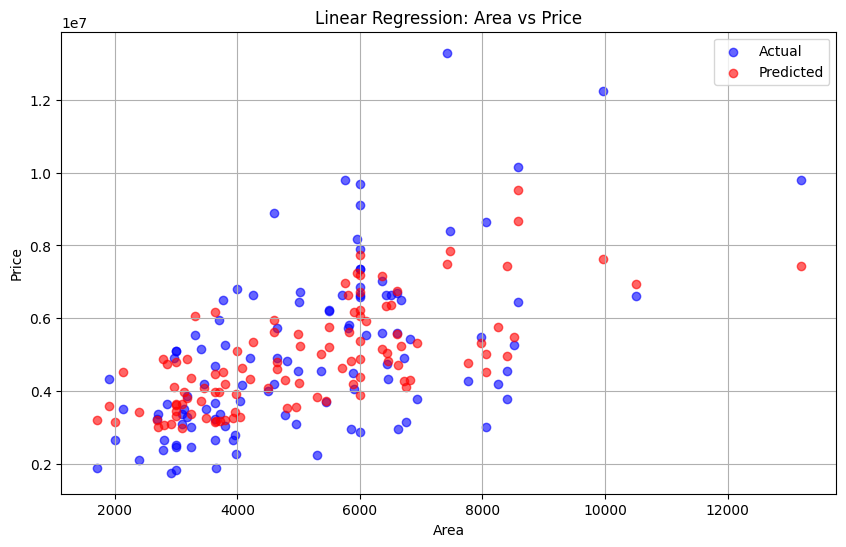

In [9]:
# Upload the file
from google.colab import files
uploaded = files.upload()

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Clean column names
df.columns = df.columns.str.strip()

# Display column names
print("Available columns in the dataset:")
print(df.columns.tolist())

# Select features and target
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
target = 'price'

# Drop rows with missing values in selected columns
df = df[features + [target]].dropna()

# Prepare X and y
X = df[features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print("\nModel Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

# Model Coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef}")
print("Intercept:", model.intercept_)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(X_test['area'], y_test, color='blue', label='Actual', alpha=0.6)
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted', alpha=0.6)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Linear Regression: Area vs Price')
plt.legend()
plt.grid(True)
plt.show()
